## DATA - PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
data=pd.read_csv("C:\\Users\\91730\\Downloads\\Employee.csv")
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


## DATA EXPLORATION

In [4]:
data.shape

(148, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [9]:
data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [11]:
data.Company.unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [12]:
len(data.Company.unique())

7

In [13]:
data.Age.unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

In [14]:
len(data.Age.unique())

30

In [15]:
data.Salary.unique()

array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.])

In [16]:
len(data.Salary.unique())

41

In [17]:
data.Place.unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [18]:
len(data.Place.unique())

12

In [20]:
data.Country.unique()

array(['India'], dtype=object)

In [21]:
data.Gender.unique()

array([0, 1], dtype=int64)

## DATA CLEANING

In [22]:
data.duplicated().sum()

4

In [25]:
newdata=data.drop_duplicates()

In [26]:
newdata.shape

(144, 6)

In [27]:
newdata.Age.value_counts()

Age
22.0    15
33.0    13
44.0    10
23.0     8
34.0     8
32.0     7
21.0     7
35.0     6
0.0      6
41.0     5
45.0     4
24.0     4
20.0     3
31.0     3
43.0     3
25.0     3
36.0     3
40.0     3
26.0     2
30.0     2
46.0     2
50.0     2
37.0     2
19.0     1
38.0     1
51.0     1
18.0     1
17.0     1
54.0     1
Name: count, dtype: int64

In [28]:
newdata.Age=newdata.Age.replace(to_replace=0,value=np.NaN)

C:\Users\91730\AppData\Local\Temp\ipykernel_15016\510536449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata.Age=newdata.Age.replace(to_replace=0,value=np.NaN)


In [30]:
newdata.Age.max(),newdata.Age.min()

(54.0, 17.0)

In [32]:
newdata[newdata.Age<18]

,Company,Age,Salary,Place,Country,Gender
85,CTS,17.0,1234.0,Calcutta,India,0


In [33]:
age_index=newdata[newdata.Age<18].index

In [34]:
newdata.drop(age_index,inplace=True)

C:\Users\91730\AppData\Local\Temp\ipykernel_15016\2969253929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata.drop(age_index,inplace=True)


In [35]:
newdata.Salary.max(),newdata.Salary.min()

(9876.0, 1089.0)

In [39]:
Q1=newdata.Salary.quantile(0.25)
Q3=newdata.Salary.quantile(0.75)
IQR=Q3-Q1
Q1,Q3,IQR


(3030.0, 8000.0, 4970.0)

In [40]:
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower,upper

(-4425.0, 15455.0)

In [41]:
newdata.isnull().sum()

Company     8
Age        23
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [42]:
newdata.Age.fillna(data.Age.mean(),inplace=True)

C:\Users\91730\AppData\Local\Temp\ipykernel_15016\597673564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata.Age.fillna(data.Age.mean(),inplace=True)


In [45]:
newdata.Salary.fillna(data.Salary.mean(),inplace=True)

C:\Users\91730\AppData\Local\Temp\ipykernel_15016\2622636022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata.Salary.fillna(data.Salary.mean(),inplace=True)


In [47]:
newdata.Company.fillna(method='bfill',inplace=True)

C:\Users\91730\AppData\Local\Temp\ipykernel_15016\112392245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata.Company.fillna(method='bfill',inplace=True)


In [48]:
newdata.Place.fillna(method='bfill',inplace=True)

C:\Users\91730\AppData\Local\Temp\ipykernel_15016\254111043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata.Place.fillna(method='bfill',inplace=True)


In [49]:
newdata.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

## DATA ANALYSIS

In [50]:
newdata[(newdata.Age>40)& (newdata.Salary<5000)]

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


Text(0, 0.5, 'Salary')

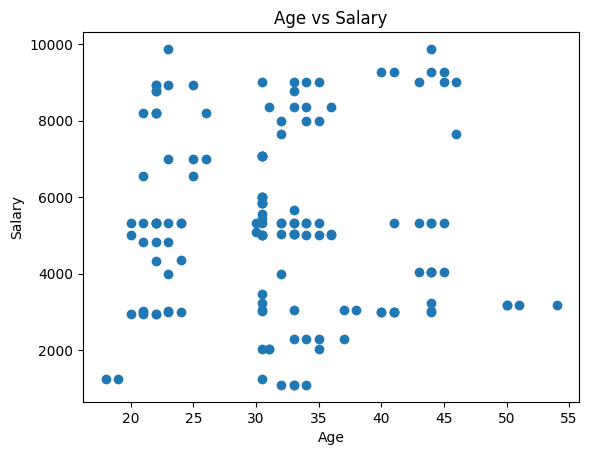

In [53]:
plt.scatter(newdata.Age,newdata.Salary)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')


In [55]:
data.Place.value_counts()

Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

<Axes: xlabel='Place'>

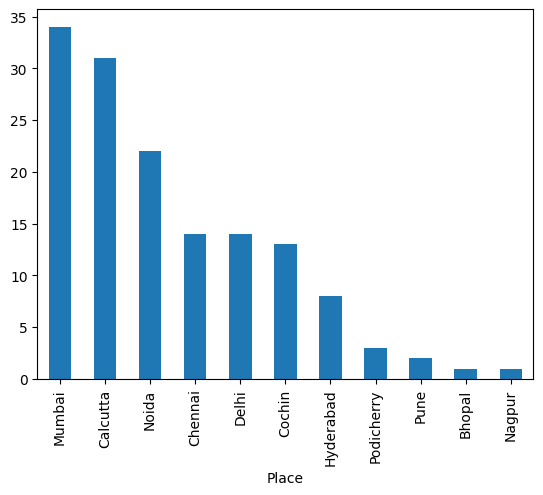

In [56]:
newdata.Place.value_counts().plot(kind = 'bar')

In [66]:
pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [74]:
data3 = pd.get_dummies(newdata,drop_first=True)
data3.head()

,Age,Salary,Gender,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,20.0,5312.467742,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,30.0,5312.467742,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.000000,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.000000,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.000000,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [75]:
scaler1=MinMaxScaler()
scaler2=StandardScaler()

In [76]:
scaled1=scaler1.fit_transform(data3)
scaled1

array([[0.05555556, 0.48064957, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.48064957, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47222222, 0.13781723, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.72222222, 0.33515421, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41666667, 0.44895869, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.80949129, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [78]:
scaled2=scaler2.fit_transform(data3)
scaled2

array([[-1.45774133e+00, -1.70026896e-03, -5.36924844e-01, ...,
        -4.26401433e-01, -1.46385011e-01, -1.19098267e-01],
       [-2.32349792e-01, -1.70026896e-03, -5.36924844e-01, ...,
        -4.26401433e-01, -1.46385011e-01, -1.19098267e-01],
       [ 3.80345977e-01, -1.28698556e+00, -5.36924844e-01, ...,
        -4.26401433e-01, -1.46385011e-01, -1.19098267e-01],
       ...,
       [ 1.48319836e+00, -5.47165290e-01,  1.86245805e+00, ...,
        -4.26401433e-01, -1.46385011e-01, -1.19098267e-01],
       [ 1.35267670e-01, -1.20510003e-01,  1.86245805e+00, ...,
        -4.26401433e-01, -1.46385011e-01, -1.19098267e-01],
       [-1.21266302e+00,  1.23113394e+00, -5.36924844e-01, ...,
        -4.26401433e-01, -1.46385011e-01, -1.19098267e-01]])